In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from utils.vsknn_train_test_utils import train_test_vsknn_models
from utils.plot_config import *
mpl.rc('lines', linewidth=plot_line_width)

In [ ]:
# # Before running this notebook make sure to execute the following commands, to create the necessary datasets:
# ! python data/coveo_preproc.py -p data/data_sources/coveo_ecommerce
# ! python data/retailrocket_preproc.py -p data/data_sources/retailrocket_ecommerce
# ! python data/rees46_preproc.py -p data/data_sources/ress46_ecommerce

For gru4rec and vsknn results see *training_window_gru4rec_test.ipynb* and *training_window_vsknn_test.ipynb* respectively

In [2]:
def format_plot(ax, handles):
    ax.legend(handles=handles, loc=1, prop={'size': fontsize*0.8}) #loc=2
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(plot_axis_line_width)
    ax.tick_params(width=plot_axis_line_width)
    ax.tick_params(axis='both', which='major', labelsize=fontsize*0.8)
    ax.tick_params(axis='both', which='minor', labelsize=fontsize*0.8)
    ax.xaxis.grid() 

\begin{equation*}
adjusted\_recall = \frac{recall * |test\_events\_subset|}{|test\_events\_original|}
\end{equation*}

 (recall * adjusted_test_size) / original test size =   
 ((recall * adjusted_test_size)                    correct recall hits now
 + 0*(original_test_size - adjusted_test_size))    no hits in original test
 / original_test_size                              rescale to original test 

recall_adjusted = recall * scale 


# Results for Retailrocket

In [3]:
res = [
    ["vsknn", "full", 0.302596, 0.475372],
    ["vsknn", "91D", 0.297011, 0.460103],
    ["vsknn", "56D", 0.291974, 0.446838],
    ["vsknn", "28D", 0.283470, 0.423083],
    ["vsknn", "14D", 0.278536, 0.406812],
    ["vsknn", "7D", 0.278947, 0.404454],
    ["gru4rec", "full", 0.322642, 0.520189],
    ["gru4rec", "91D", 0.304928, 0.502999],
    ["gru4rec", "56D", 0.283368, 0.458149],
    ["gru4rec", "28D", 0.261608, 0.428283],
    ["gru4rec", "14D", 0.190422, 0.305230],
    ["gru4rec", "7D", 0.235926, 0.366149],
]
results = pd.DataFrame(res, columns=["model", "days", "Recall@5", "Recall@20"])
rescale = pd.read_csv("data/data_sources/retailrocket_ecommerce/retailrocket_recall_rescale.tsv", sep='\t')

In [4]:
rescale["days"] = rescale.dataset.str.split('_').apply(lambda x: x[-1]).str.replace(".tsv", '', regex=False)
results = pd.merge(results, rescale, on="days", how="inner")
results["Recall@5"] = results["Recall@5"] * results["scale"]
results["Recall@20"] = results["Recall@20"] * results["scale"]

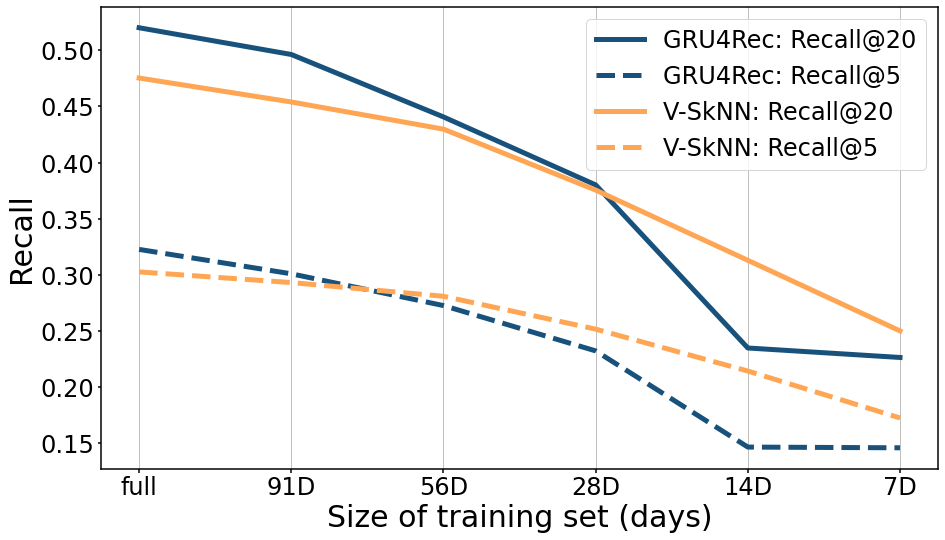

In [5]:
fig, ax = plt.subplots(figsize=(15,8.5))
handles = []
for model_name, display_name in {"gru4rec": "GRU4Rec", "vsknn": "V-SkNN"}.items():
    data = results[results.model==model_name]
    for i, metric in enumerate(["Recall@20", "Recall@5"]):
        c = colors["color_0"] if model_name == "gru4rec" else colors["color_1"]
        p, = ax.plot(data.days, data[metric], label=f"{display_name}: {metric}", c=c, linestyle = linestyles[i]) 
        handles.append(p)
ax.set_xlabel("Size of training set (days)", fontsize=fontsize)
ax.set_ylabel("Recall", fontsize=fontsize)
format_plot(ax=ax, handles=handles)